# Homework 4

### Name: Hannah Marr
### Collaborator:


DATA 201

Fall 2024

Tufts University

# Part 1 - Linear Regression

### Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Question 1
(a) Read in 'Fish.csv' as a dataframe. How many different species of fish does the dataset contain? Use the LabelEncoder to transform the species column. 

In [9]:
# 1. a. Read in 'Fish.csv' as a dataframe
fish = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/DATA201/Fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [11]:
# 1. a. Determine how many different species of fish the dataset contains
unique_species_count = fish['Species'].nunique()
unique_species_count

7

In [13]:
# 1. a. Use LabelEncoder to transform the species column.
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Transform the 'Species' column
fish['Species_encoded'] = label_encoder.fit_transform(fish['Species'])

# Display the first few rows to show the transformed column
fish[['Species', 'Species_encoded']].head()

,Species,Species_encoded
0,Bream,0
1,Bream,0
2,Bream,0
3,Bream,0
4,Bream,0


(b) Separate the dataframe into an $X$ and $y$ variable, for this data our response variable / predicted variable is going to be the column 'Weight'. 

In [17]:
# 1. b. 
# Define X as the feature variables and y as the target variable
X = fish.drop(columns=['Weight', 'Species'])  # Drop the target column from the features, as well as the non-encoded Species column to ensure numeric data only
y = fish['Weight']  # Define the target variable

# Display the shapes of X and y to confirm the separation
X.shape, y.shape

((159, 6), (159,))

(c) Split the $X$ and $y$ data into train and test sets (with test_size = 20), and run linear regression on the train set. 

In [29]:
# 1. c.
# Split the data into train and test sets with a test size of 20 samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42)

# Initialize and fit the Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Make predictions on the train set
y_train_pred = lin_reg_model.predict(X_train)

# Calculate performance metrics on the train set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print('Train set MSE:', train_mse)
print('Train set R2:', train_r2)

Train set MSE: 13770.21197105879
Train set R2: 0.8882202772056529


(d) Report the MSE and r^2 metrics for the test set.

In [31]:
# 1. d.
# Make predictions on the test set
y_test_pred = lin_reg_model.predict(X_test)

# Calculate performance metrics on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Train set MSE:', test_mse)
print('Train set R2:', test_r2)

Train set MSE: 11479.353566283946
Train set R2: 0.9232041244316285


## Question 2
Write a function that will compute the MSE of a set of true variables and its corresponding predicted variables. This function should take in two variables, a y_test set and a y_pred set, and it should return a single number. Test to see if your function gives the same output as the built in MSE function.

In [33]:
# 2. Define a function to calculate the Mean Squared Error manually
def compute_mse(y_test, y_pred):
    """
    Compute the Mean Squared Error between the true and predicted values.
    
    Parameters:
    y_test (array-like): Array of true target values.
    y_pred (array-like): Array of predicted target values.
    
    Returns:
    float: The Mean Squared Error.
    """
    mse = sum((y_test - y_pred) ** 2) / len(y_test)
    return mse

# Test the function with y_test and y_test_pred and compare with the built-in mean_squared_error function
custom_mse = compute_mse(y_test, y_test_pred)
builtin_mse = mean_squared_error(y_test, y_test_pred)

custom_mse, builtin_mse

(11479.353566283948, 11479.353566283946)

## Question 3
Create a heatmap of the correlations between correlations of the $X$ data, comment on the values (are they relatively high, relatively low? Is that expected?)

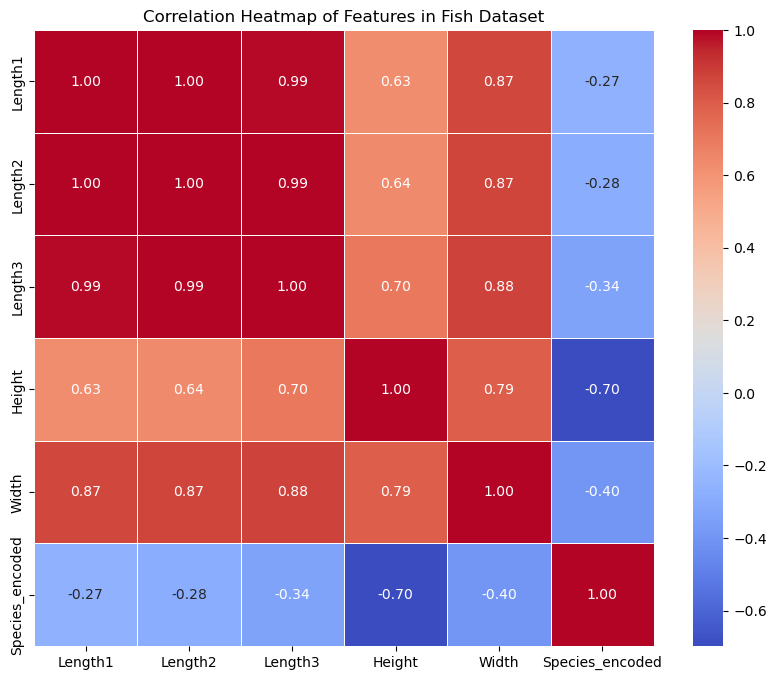

In [37]:
# 3.
# Calculate the correlation matrix of the features in X
correlation_matrix = X.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features in Fish Dataset")
plt.show()

Relatively High Correlations:

Length1, Length2, Length3: These length measurements are highly correlated with each other (values close to 1). This high correlation is expected since these measurements likely represent related dimensions of the fish and naturally scale together.

Height and Lengths: Height has a moderately high correlation with the lengths, which makes sense, as larger fish would generally have increased dimensions across both height and length.


Relatively Low Correlations:

Species_encoded with Lengths, Height, and Width: The Species_encoded column shows lower correlations with physical measurements. This indicates that while there may be some variance in fish measurements by species, they do not have strong linear associations with specific physical dimensions.

Width with Lengths and Height: Width shows moderate to low correlation with other dimensions, suggesting it varies more independently compared to the lengths and height.

In general, these values align with expectations, as fish dimensions are usually related to each other but don’t strictly determine species.

# Part 2 - Logistic Regression 
We will go over Logistic Regression ROC and AUC, and the RFECV function. The data we are using is the csv named 'surfs_up.csv'. This data has seven columns of data long with a binary classification. Each column represents a certain attribute of the days conditions, and the binary classification is whether it is a good day to surf or not (subjectively picked by the person who made the dataset). The columns, in order of appearance, are as follows:

Air Temperature, in Fahrenheit


Wind Gust, in meters per second


Average Wave Period, in seconds


Wind Speed, in meters per second


Wave Height, in feet


Water Temperature, in Fahrenheit


Dominant Wave Period, in seconds

### Packages

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Question 1 - Get to know the data
(a) Load in the data 'surfsup.csv' into a dataframe, and remove the two blank columns. 

In [42]:
# 1. a. 
surf = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/DATA201/surfs_up.csv')
surf.head()

,3.7625,12.37916667,4.42125,10.35833333,5.1591209,45.5,5.39375,Unnamed: 7,Unnamed: 8,0
0,8.5550,12.970833,4.278000,11.254167,4.921260,44.384000,5.228000,NaN,NaN,0
1,22.0550,10.158333,3.908095,8.995833,3.790933,43.935714,4.502857,NaN,NaN,0
2,28.0700,14.495833,5.226667,12.787500,9.072206,43.981250,6.241667,NaN,NaN,0
3,18.2600,20.779167,6.984783,18.000000,13.118367,44.466957,10.050870,NaN,NaN,0
4,6.2075,19.037500,5.572500,16.233333,9.594220,43.757273,6.553864,NaN,NaN,0


In [44]:
# There are no column titles, so we can create column titles based on the metadata we've been given
col_names = ['Air_Temp', 'Wind_Gust', 'Avg_Wave_Pd', 'Wind_Speed', 'Wave_Height', 'Water_Temp', 'Dominant_Wave_Pd', 'BLANK1', 'BLANK2', 'Good_Surf_Day']

surf = pd.read_csv("/Users/hannahmarr/Desktop/Tufts/DATA201/surfs_up.csv", header= 1, names=col_names)

surf.head()

,Air_Temp,Wind_Gust,Avg_Wave_Pd,Wind_Speed,Wave_Height,Water_Temp,Dominant_Wave_Pd,BLANK1,BLANK2,Good_Surf_Day
0,22.0550,10.158333,3.908095,8.995833,3.790933,43.935714,4.502857,NaN,NaN,0
1,28.0700,14.495833,5.226667,12.787500,9.072206,43.981250,6.241667,NaN,NaN,0
2,18.2600,20.779167,6.984783,18.000000,13.118367,44.466957,10.050870,NaN,NaN,0
3,6.2075,19.037500,5.572500,16.233333,9.594220,43.757273,6.553864,NaN,NaN,0
4,4.1000,13.137500,5.170000,11.320833,7.729659,43.718000,6.297000,NaN,NaN,0


In [48]:
# 1. a. Drop the two blank columns
surf = surf.drop(columns = ['BLANK1', 'BLANK2'])
surf.head()

,Air_Temp,Wind_Gust,Avg_Wave_Pd,Wind_Speed,Wave_Height,Water_Temp,Dominant_Wave_Pd,Good_Surf_Day
0,22.0550,10.158333,3.908095,8.995833,3.790933,43.935714,4.502857,0
1,28.0700,14.495833,5.226667,12.787500,9.072206,43.981250,6.241667,0
2,18.2600,20.779167,6.984783,18.000000,13.118367,44.466957,10.050870,0
3,6.2075,19.037500,5.572500,16.233333,9.594220,43.757273,6.553864,0
4,4.1000,13.137500,5.170000,11.320833,7.729659,43.718000,6.297000,0


(b) Rename the columns based off of the data description. 

In [ ]:
# 1. b. Already done above, but here is the code I used to do it
col_names = ['Air_Temp', 'Wind_Gust', 'Avg_Wave_Pd', 'Wind_Speed', 'Wave_Height', 'Water_Temp', 'Dominant_Wave_Pd', 'BLANK1', 'BLANK2', 'Good_Surf_Day']

surf = pd.read_csv("/Users/hannahmarr/Desktop/Tufts/DATA201/surfs_up.csv", header= 1, names=col_names)

surf.head()

(c) Report how many of each class there is.

In [52]:
# 1. c. Count the occurrences of each class in the 'Good_Surf_Day' column
surf_class_counts = surf['Good_Surf_Day'].value_counts()

surf_class_counts

Good_Surf_Day
0    100
1     98
Name: count, dtype: int64

## Question 2 - An ROC curve from basic threshold classification
(a) Create a new variable that is just the Dominant Wave Period column, and also create a response column variable. 

In [56]:
# 2. a. 
# Create a new variable that is just the Dominant Wave Period column
dominant_wave_period = surf['Dominant_Wave_Pd']

# Create a response column variable which is the 'Good_Surf_Day' column
response_column = surf['Good_Surf_Day']

# Display the first few entries of both new variables to confirm
dominant_wave_period.head(), response_column.head()

(0     4.502857
 1     6.241667
 2    10.050870
 3     6.553864
 4     6.297000
 Name: Dominant_Wave_Pd, dtype: float64,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: Good_Surf_Day, dtype: int64)

(b) Create a function that takes in a Series and a threshold, and returns a series of predictions based off of the threshold (1 for above the threshold, 0 for below it). 

In [58]:
# 1. b. Define a function to generate predictions based on a threshold
def threshold_predictions(series: pd.Series, threshold: float) -> pd.Series:
    """
    Returns a series of predictions based on the threshold.
    Values above the threshold are labeled as 1, and values below or equal to the threshold as 0.
    
    Parameters:
    series (pd.Series): The series to apply the threshold to.
    threshold (float): The threshold value for classification.
    
    Returns:
    pd.Series: Series of 1s and 0s representing predictions.
    """
    return (series > threshold).astype(int)

# Testing the function with the Dominant Wave Period series and a sample threshold
sample_predictions = threshold_predictions(dominant_wave_period, threshold=6.0)
sample_predictions.head()

0    0
1    1
2    1
3    1
4    1
Name: Dominant_Wave_Pd, dtype: int64

(c) Create a linear range of 10 points in the actual range of the data, run your function on each point as your threshold value, and at each point find the TPR and FPR associated with the threshold. 

In [62]:
# 1. c.
# Calculate the actual range of the Dominant Wave Period data
min_value = dominant_wave_period.min()
max_value = dominant_wave_period.max()

# Create a linear range of 10 points between the min and max values
thresholds = np.linspace(min_value, max_value, 10)

# Function to calculate True Positive Rate (TPR) and False Positive Rate (FPR)
def calculate_tpr_fpr(predictions: pd.Series, actuals: pd.Series) -> tuple:
    """
    Calculates the True Positive Rate (TPR) and False Positive Rate (FPR).
    
    Parameters:
    predictions (pd.Series): Series of binary predictions (0 and 1).
    actuals (pd.Series): Series of actual binary labels (0 and 1).
    
    Returns:
    tuple: TPR and FPR values.
    """
    true_positives = ((predictions == 1) & (actuals == 1)).sum()
    false_positives = ((predictions == 1) & (actuals == 0)).sum()
    true_negatives = ((predictions == 0) & (actuals == 0)).sum()
    false_negatives = ((predictions == 0) & (actuals == 1)).sum()
    
    tpr = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    fpr = false_positives / (false_positives + true_negatives) if (false_positives + true_negatives) > 0 else 0
    
    return tpr, fpr

# Calculate TPR and FPR for each threshold in the range
tpr_fpr_results = []
for threshold in thresholds:
    predictions = threshold_predictions(dominant_wave_period, threshold)
    tpr, fpr = calculate_tpr_fpr(predictions, response_column)
    tpr_fpr_results.append((threshold, tpr, fpr))

# Convert the results into a DataFrame for better readability
tpr_fpr_df = pd.DataFrame(tpr_fpr_results, columns=['Threshold', 'TPR', 'FPR'])

tpr_fpr_df

,Threshold,TPR,FPR
0,3.686875,1.000000,0.99
1,6.371574,1.000000,0.29
2,9.056273,0.397959,0.05
3,11.740972,0.112245,0.01
4,14.425671,0.040816,0.01
5,17.110370,0.000000,0.01
6,19.795069,0.000000,0.01
7,22.479769,0.000000,0.01
8,25.164468,0.000000,0.01
9,27.849167,0.000000,0.00


(d) Plot the points as pairs (FPR,TPR), but first sorting by FPR. 

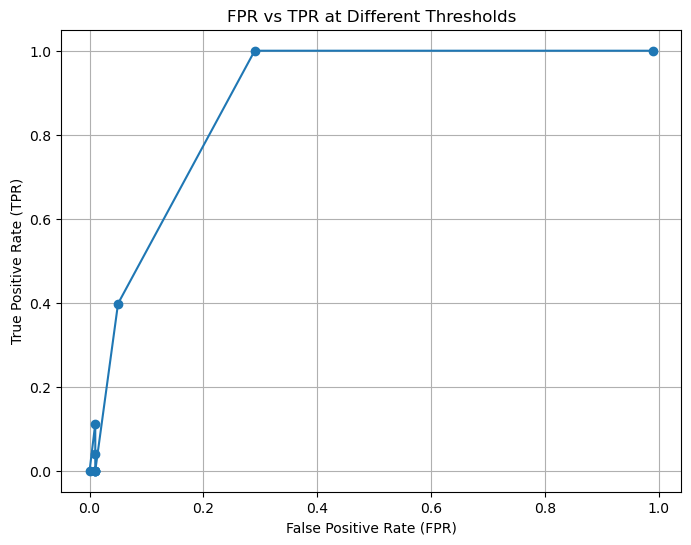

In [66]:
# 1. d.
import matplotlib.pyplot as plt

# Sort the dataframe by FPR for proper plotting order
tpr_fpr_df_sorted = tpr_fpr_df.sort_values(by='FPR')

# Plot FPR vs TPR as pairs
plt.figure(figsize=(8, 6))
plt.plot(tpr_fpr_df_sorted['FPR'], tpr_fpr_df_sorted['TPR'], marker='o', linestyle='-')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('FPR vs TPR at Different Thresholds')
plt.grid(True)
plt.show()

(e) Repeat part (c) and (d) except for 25 different thresholds in the range.

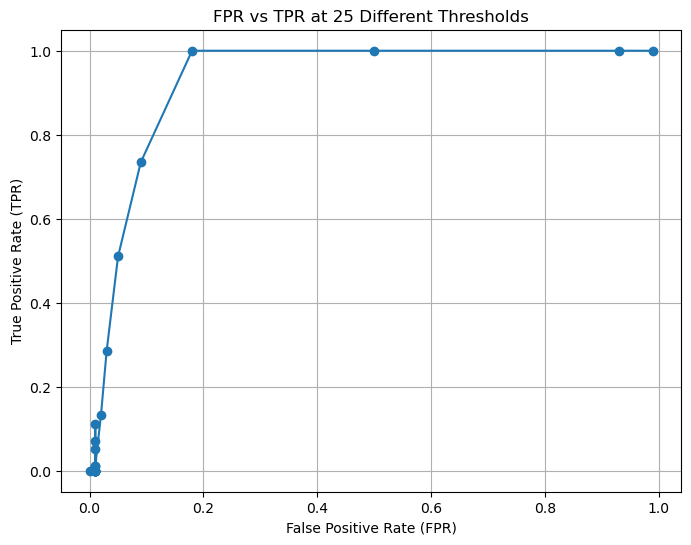

In [72]:
# 1. e.
# Create a linear range of 25 points between the min and max values for more granularity
thresholds_25 = np.linspace(min_value, max_value, 25)

# Calculate TPR and FPR for each threshold in the new range
tpr_fpr_results_25 = []
for threshold in thresholds_25:
    predictions = threshold_predictions(dominant_wave_period, threshold)
    tpr, fpr = calculate_tpr_fpr(predictions, response_column)
    tpr_fpr_results_25.append((threshold, tpr, fpr))

# Convert the results into a DataFrame and sort by FPR
tpr_fpr_df_25 = pd.DataFrame(tpr_fpr_results_25, columns=['Threshold', 'TPR', 'FPR']).sort_values(by='FPR')

# Plot FPR vs TPR as pairs for the 25 thresholds
plt.figure(figsize=(8, 6))
plt.plot(tpr_fpr_df_25['FPR'], tpr_fpr_df_25['TPR'], marker='o', linestyle='-')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('FPR vs TPR at 25 Different Thresholds')
plt.grid(True)
plt.show()

In [74]:
tpr_fpr_df_25

,Threshold,TPR,FPR
24,27.849167,0.000000,0.00
22,25.835642,0.000000,0.01
21,24.828880,0.000000,0.01
20,23.822118,0.000000,0.01
19,22.815356,0.000000,0.01
18,21.808594,0.000000,0.01
17,20.801832,0.000000,0.01
16,19.795069,0.000000,0.01
15,18.788307,0.000000,0.01
14,17.781545,0.000000,0.01


## Question 3 - One-Dim Logistic Regression
(a) Run a logistic regression on the single column we were using in Q2, using a testsize of 0.3. Create and display the confusion matrix, report the accuracy. 

In [78]:
# 3. a.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Split the data into training and testing sets with a test size of 0.3
X = dominant_wave_period.values.reshape(-1, 1)
y = response_column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and fit a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate the confusion matrix and accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix:\n', conf_matrix)
print('Accuracy score:', accuracy)

Confusion matrix:
 [[28  4]
 [ 8 20]]
Accuracy score: 0.8


(b) Pull the coefficient and intercept out of the model and transform the Series based off of the sigmoid function. Plot the transformed data against the original data, i.e. the series will be the x variable and the transformed data will be the y data. What is a reasonable decision threshold here? 

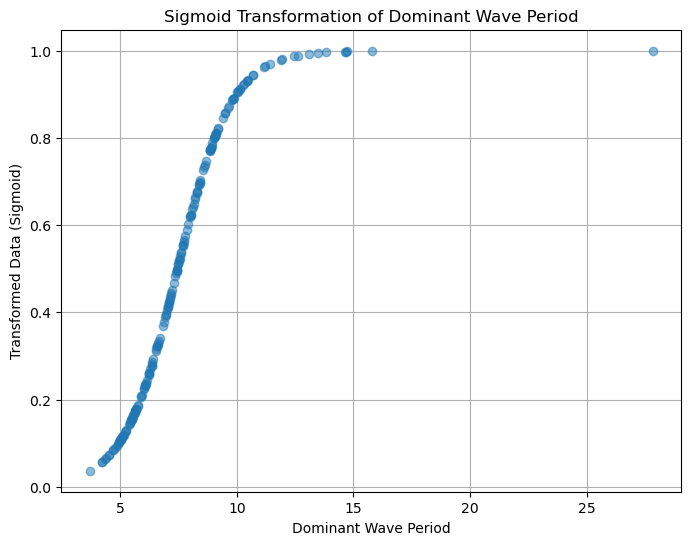

count    198.000000
mean       0.489930
std        0.305202
min        0.036782
25%        0.180899
50%        0.459110
75%        0.777361
max        1.000000
Name: Dominant_Wave_Pd, dtype: float64

In [80]:
# 3. b.
# Extract the coefficient and intercept from the logistic regression model
coef = log_reg.coef_[0][0]
intercept = log_reg.intercept_[0]

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-(coef * x + intercept)))

# Apply the sigmoid function to the Dominant Wave Period series
transformed_data = dominant_wave_period.apply(sigmoid)

# Plot the original data (Dominant Wave Period) against the transformed data
plt.figure(figsize=(8, 6))
plt.plot(dominant_wave_period, transformed_data, 'o', alpha=0.5)
plt.xlabel('Dominant Wave Period')
plt.ylabel('Transformed Data (Sigmoid)')
plt.title('Sigmoid Transformation of Dominant Wave Period')
plt.grid(True)
plt.show()

# Display a reasonable decision threshold
transformed_data.describe()

Based on the distribution of the transformed data, a reasonable decision threshold could be around 0.46, as it represents the midpoint probability of the transformed dominant wave period data, and thus would generally mark the point where the logistic regression model would typically decide between classes.

(c) Plot the ROC curve for the model and report the AUC.

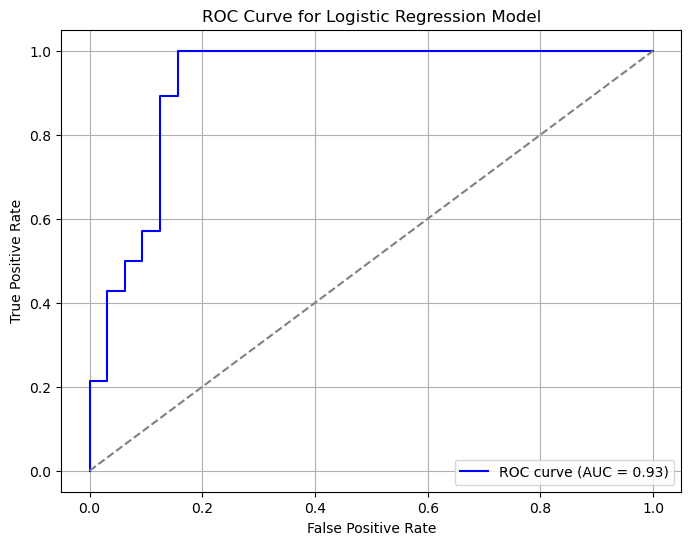

0.9252232142857143

In [83]:
# 3. c.
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate predicted probabilities for the test set
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

auc_score